In [53]:
library(ggplot2)

In [54]:
scds_dir = "/directflow/SCCGGroupShare/projects/anncuo/TenK10K_pilot/tenk10k/data_processing/demuxafy/scds_output/"
samples = list.files(scds_dir)
length(samples)
samples

[1] 224

[1] "S0001a"       "S0001b"       "S0001c"       "S0002a"       "S0002b"      
  [6] "S0002c"       "S0003a"       "S0003b"       "S0003c"       "S0004a"      
 [11] "S0004b"       "S0004c"       "S0005a"       "S0005b"       "S0005c"      
 [16] "S0006a"       "S0006b"       "S0006c"       "S0007a"       "S0007b"      
 [21] "S0007c"       "S0008a"       "S0008b"       "S0008c"       "S0009a"      
 [26] "S0009b"       "S0009c"       "S0010a"       "S0010b"       "S0010c"      
 [31] "S0011a"       "S0011b"       "S0011c"       "S0012a"       "S0012b"      
 [36] "S0012c"       "S0013a"       "S0013b"       "S0013c"       "S0014a"      
 [41] "S0014b"       "S0014c"       "S0015a"       "S0015b"       "S0015c"      
 [46] "S0016a"       "S0016b"       "S0016c"       "S0017b"       "S0017c"      
 [51] "S0018a"       "S0018b"       "S0018c"       "S0019b"       "S0019c"      
 [56] "S0020a"       "S0020b"       "S0020c"       "S0021-24a"    "S0021-24b"   
 [61] "S0021a"       "S0021b"       "S0021c"       "S0022a"       "S0022b"      
 [66] "S0022c"       "S0023a"       "S0023b"       "S0023c"       "S0024a"      
 [71] "S0024b"       "S0024c"       "S0025-28a"    "S0025-28b"    "S0025a"      
 [76] "S0025b"       "S0025c"       "S0026a"       "S0026b"       "S0026c"      
 [81] "S0027a"       "S0027b"       "S0027c"       "S0028a"       "S0028b"      
 [86] "S0028c"       "S0030-33a"    "S0030-33b"    "S0030a"       "S0030b"      
 [91] "S0030c"       "S0031a"       "S0031b"       "S0031c"       "S0032a"      
 [96] "S0032b"       "S0032c"       "S0033a"       "S0033b"       "S0033c"      
[101] "S0034-37a"    "S0034-37b"    "S0034a"       "S0034b"       "S0034c"      
[106] "S0035a"       "S0035b"       "S0035c"       "S0036a"       "S0036b"      
[111] "S0036c"       "S0037a"       "S0037b"       "S0037c"       "S0038a"      
[116] "S0038b"       "S0038c"       "S0038d"       "S0039a"       "S0039b"      
[121] "S0040_repeat" "S0041"        "S0042_repeat" "S0043"        "S0044"       
[126] "S0045"        "S0046"        "S0047"        "S0048"        "S0049"       
[131] "S0050"        "S0051"        "S0052"        "S0053"        "S0054"       
[136] "S0055"        "S0056"        "S0058-59v2"   "S0060"        "S0061"       
[141] "S0062"        "S0063"        "S0064"        "S0065"        "S0066"       
[146] "S0067"        "S0068"        "S0069"        "S0070"        "S0071"       
[151] "S0072"        "S0073"        "S0074"        "S0075"        "S0076"       
[156] "S0077"        "S0078"        "S0079"        "S0080"        "S0081"       
[161] "S0082"        "S0083"        "S0083_re"     "S0084"        "S0085"       
[166] "S0086"        "S0087"        "S0088"        "S0088_re"     "S0089"       
[171] "S0090"        "S0091"        "S0092"        "S0093"        "S0094_re"    
[176] "S0095"        "S0096"        "S0097"        "S0098"        "S0099"       
[181] "S0100"        "S0101"        "S0103_re"     "S0105"        "S0106"       
[186] "S0107"        "S0108"        "S0109"        "S0110"        "S0111"       
[191] "S0112"        "S0113"        "S0114"        "S0115"        "S0116"       
[196] "S0117"        "S0118"        "S0119"        "S0120"        "S0121"       
[201] "S0122"        "S0123"        "S0124"        "S0125"        "S0126"       
[206] "S0127"        "S0128"        "S0129"        "S0130"        "S0131"       
[211] "S0132"        "S0133"        "S0134"        "S0135"        "S0136"       
[216] "S0137"        "S0138"        "S0139"        "S0140"        "S0141"       
[221] "S0142"        "S0143"        "S0144"        "S0145"

In [55]:
sample = samples[1]
file = paste0(scds_dir, sample, "/scds_doublet_summary.tsv")
df = read.csv(file, sep="\t")
head(df)

,Classification,Droplet.N
,<chr>,<int>
1,doublet,3517
2,singlet,28007


In [56]:
df_summary = data.frame()
for (sample in samples){
    file = paste0(scds_dir, sample, "/scds_doublet_summary.tsv")
    df = read.csv(file, sep="\t")
    new_df = data.frame(sample = sample,
                        doublet_n = df[df$Classification == "doublet","Droplet.N"],
                        singlet_n = df[df$Classification == "singlet","Droplet.N"])
    new_df$doublet_pct = new_df$doublet_n/(new_df$doublet_n + new_df$singlet_n)*100
    df_summary = rbind(df_summary, new_df)
}
head(df_summary)

,sample,doublet_n,singlet_n,doublet_pct
,<chr>,<int>,<int>,<dbl>
1,S0001a,3517,28007,11.156579
2,S0001b,3700,28719,11.413060
3,S0001c,3298,27248,10.796831
4,S0002a,2253,19965,10.140427
5,S0002b,2021,19828,9.249851
6,S0002c,1987,19938,9.062714


In [57]:
nrow(df_summary)

[1] 224

In [58]:
mean(df_summary$doublet_pct)

[1] 11.30611

In [59]:
mean(df_summary[1:120,]$doublet_pct)
mean(df_summary[121:224,]$doublet_pct)

[1] 11.4617

[1] 11.12658

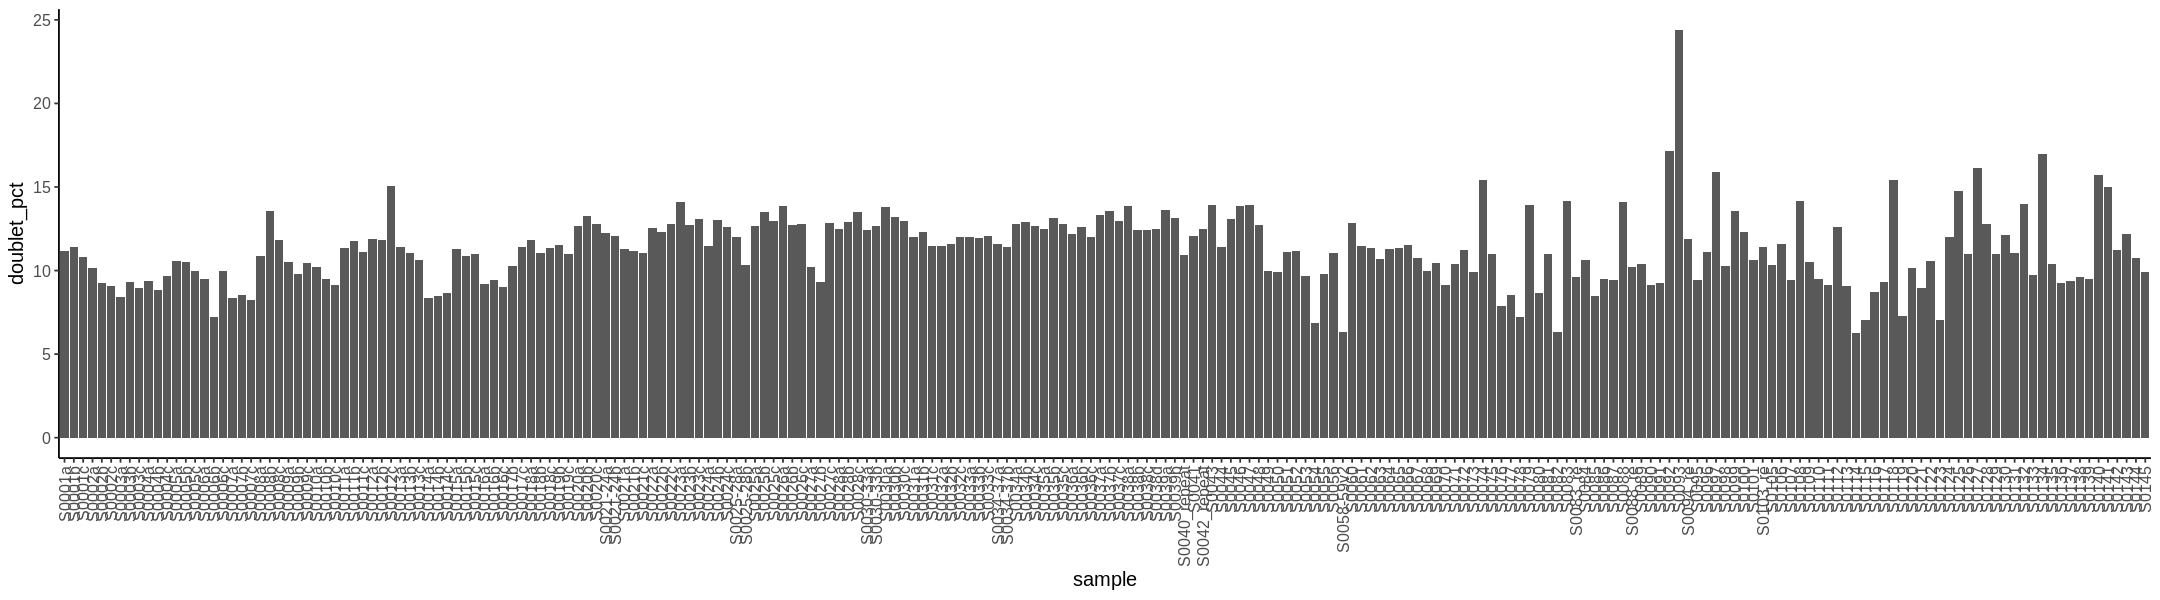

In [28]:
options(repr.plot.width = 18, repr.plot.height = 5)
p = ggplot(df_summary, aes(x=sample, y=doublet_pct)) + geom_bar(stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=12))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p

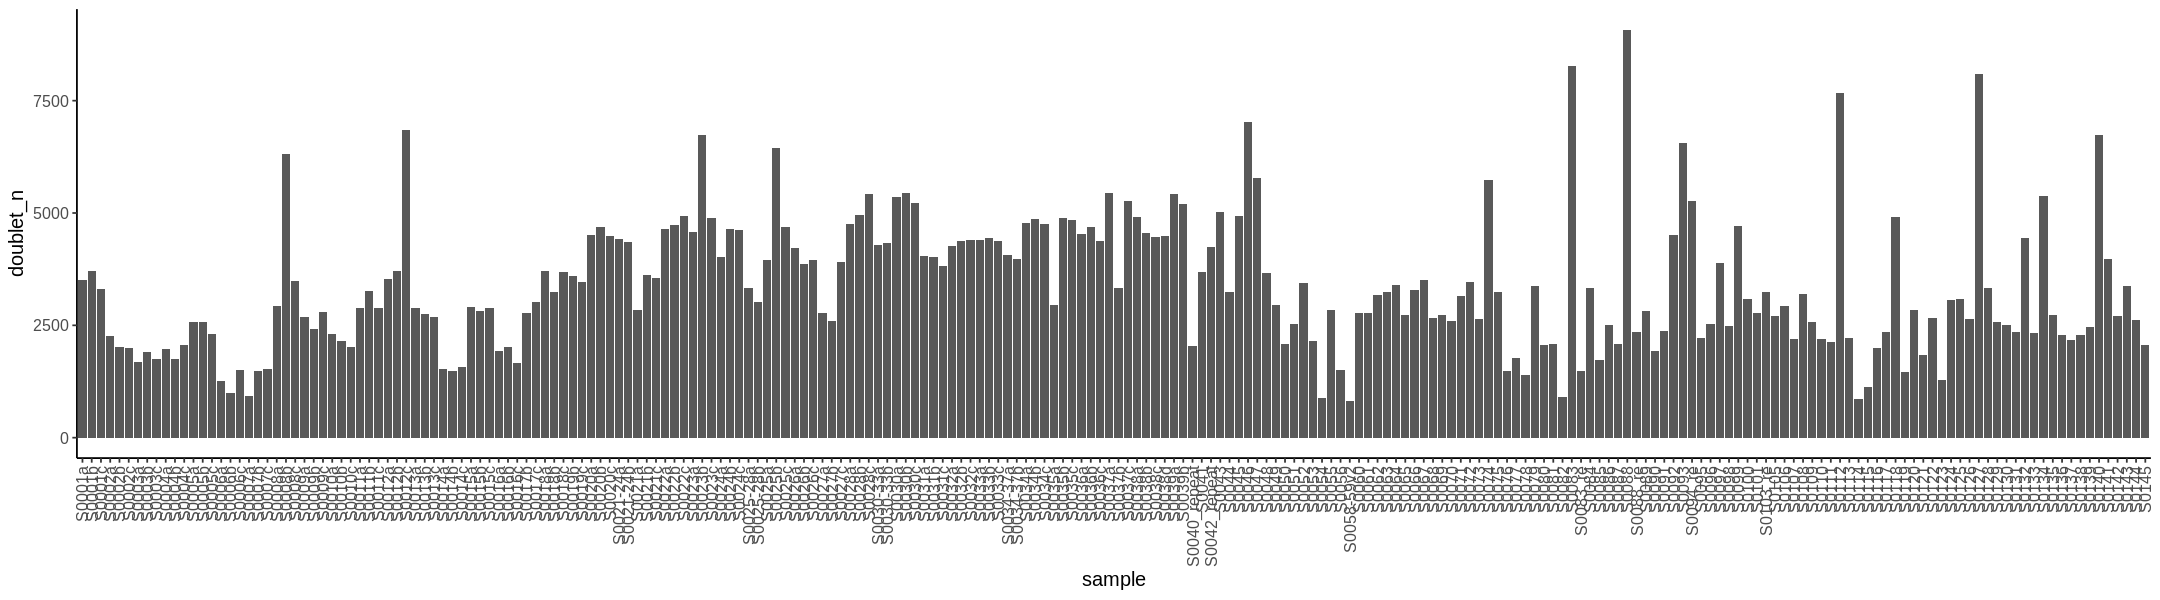

In [29]:
p = ggplot(df_summary, aes(x=sample, y=doublet_n)) + geom_bar(stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=12))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p

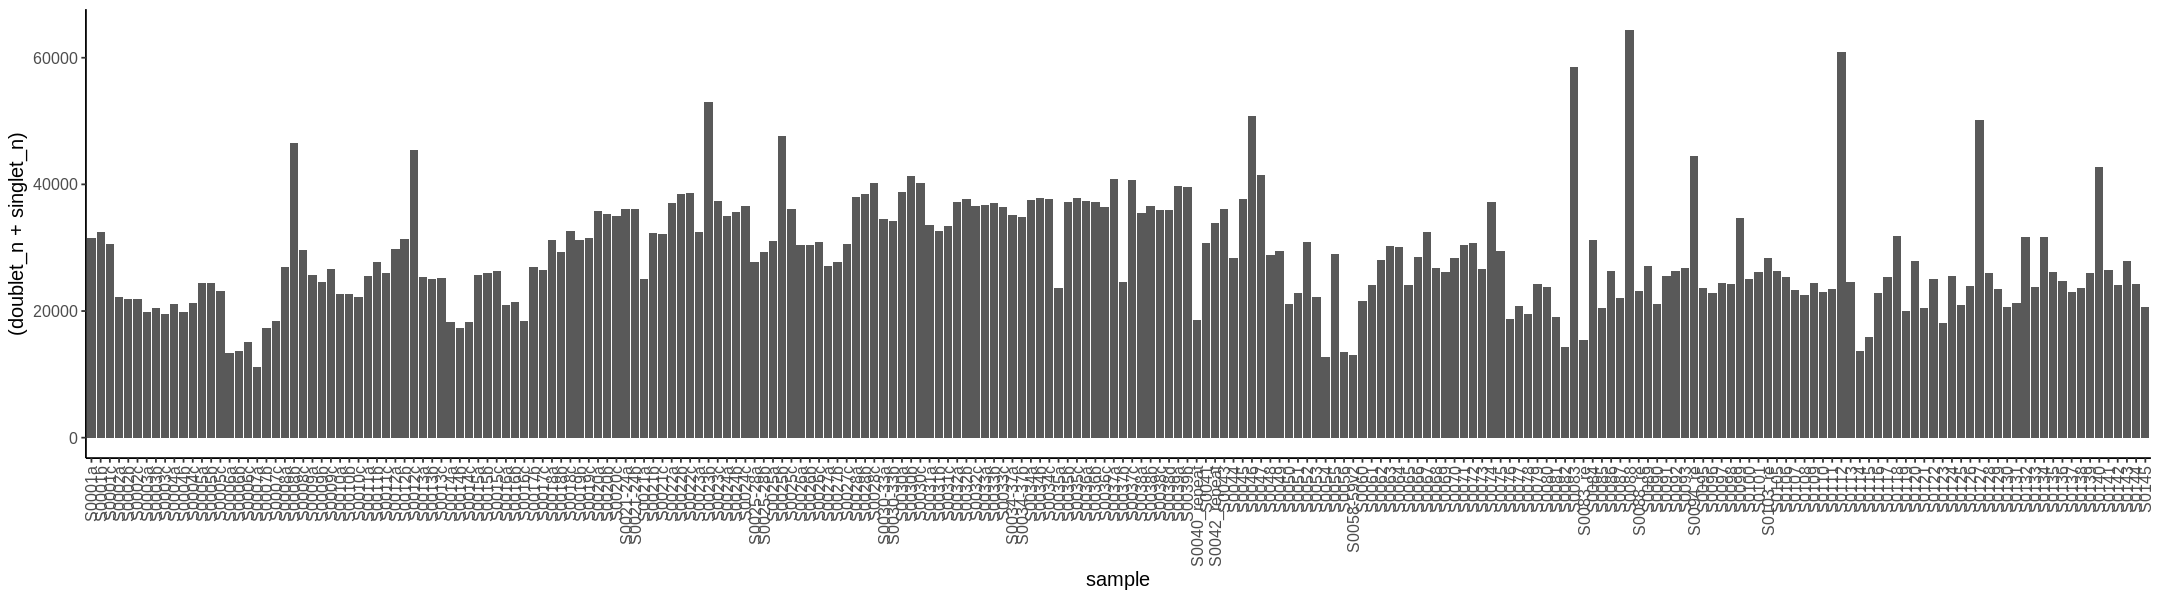

In [30]:
p = ggplot(df_summary, aes(x=sample, y=(doublet_n+singlet_n))) + geom_bar(stat = "identity")
p = p + theme_classic() + theme(text = element_text(size=12))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p

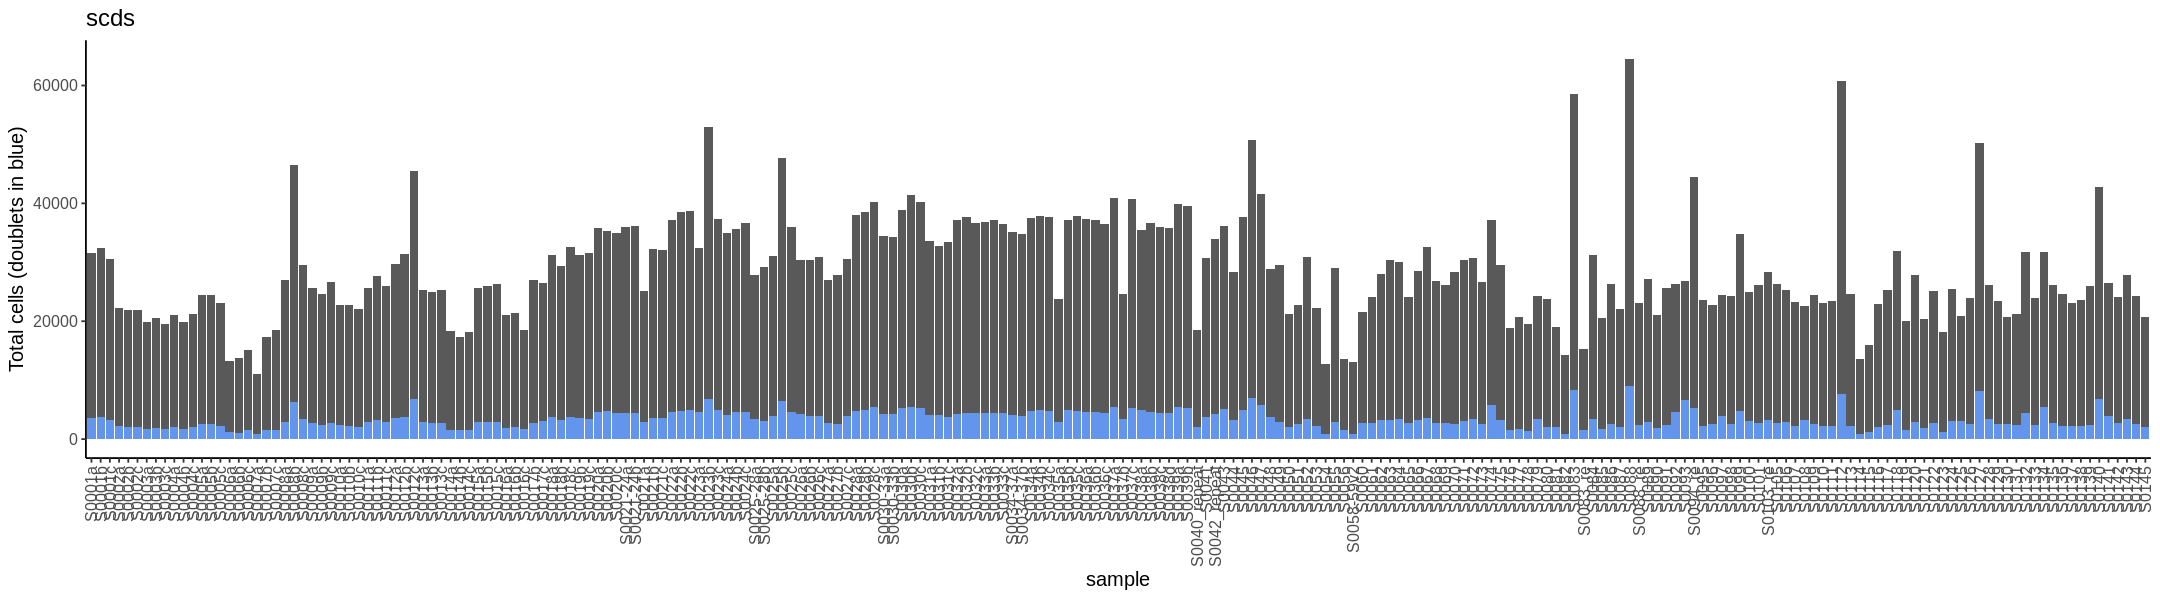

In [31]:
p = ggplot(df_summary, aes(x=sample, y=(doublet_n+singlet_n))) + geom_bar(stat = "identity")
p = p + geom_bar(stat = "identity", aes(x=sample, y=doublet_n), fill="cornflowerblue")
p = p + theme_classic() + theme(text = element_text(size=12))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p = p + ylab("Total cells (doublets in blue)") + ggtitle("scds")
p

In [32]:
nrow(df_summary)

[1] 224

In [60]:
df_summary1 = df_summary[1:120,]
df_summary2 = df_summary[121:224,]

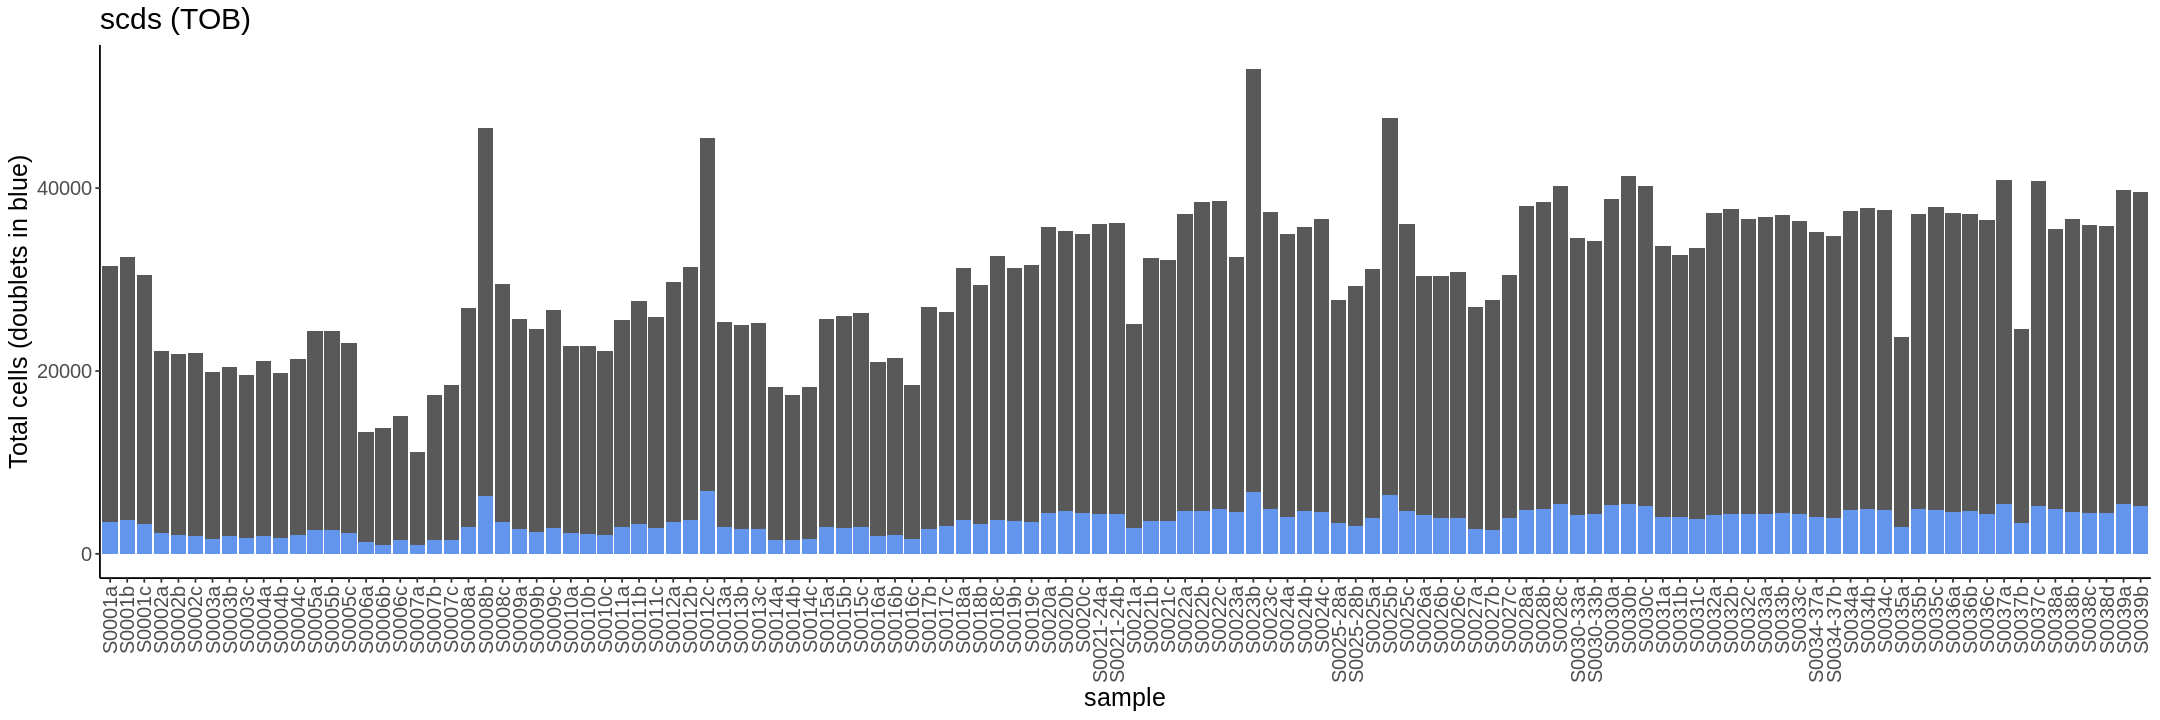

In [61]:
options(repr.plot.width = 18, repr.plot.height = 6)
p = ggplot(df_summary1, aes(x=sample, y=(doublet_n+singlet_n))) + geom_bar(stat = "identity")
p = p + geom_bar(stat = "identity", aes(x=sample, y=doublet_n), fill="cornflowerblue")
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p1 = p + ylab("Total cells (doublets in blue)") + ggtitle("scds (TOB)")
p1

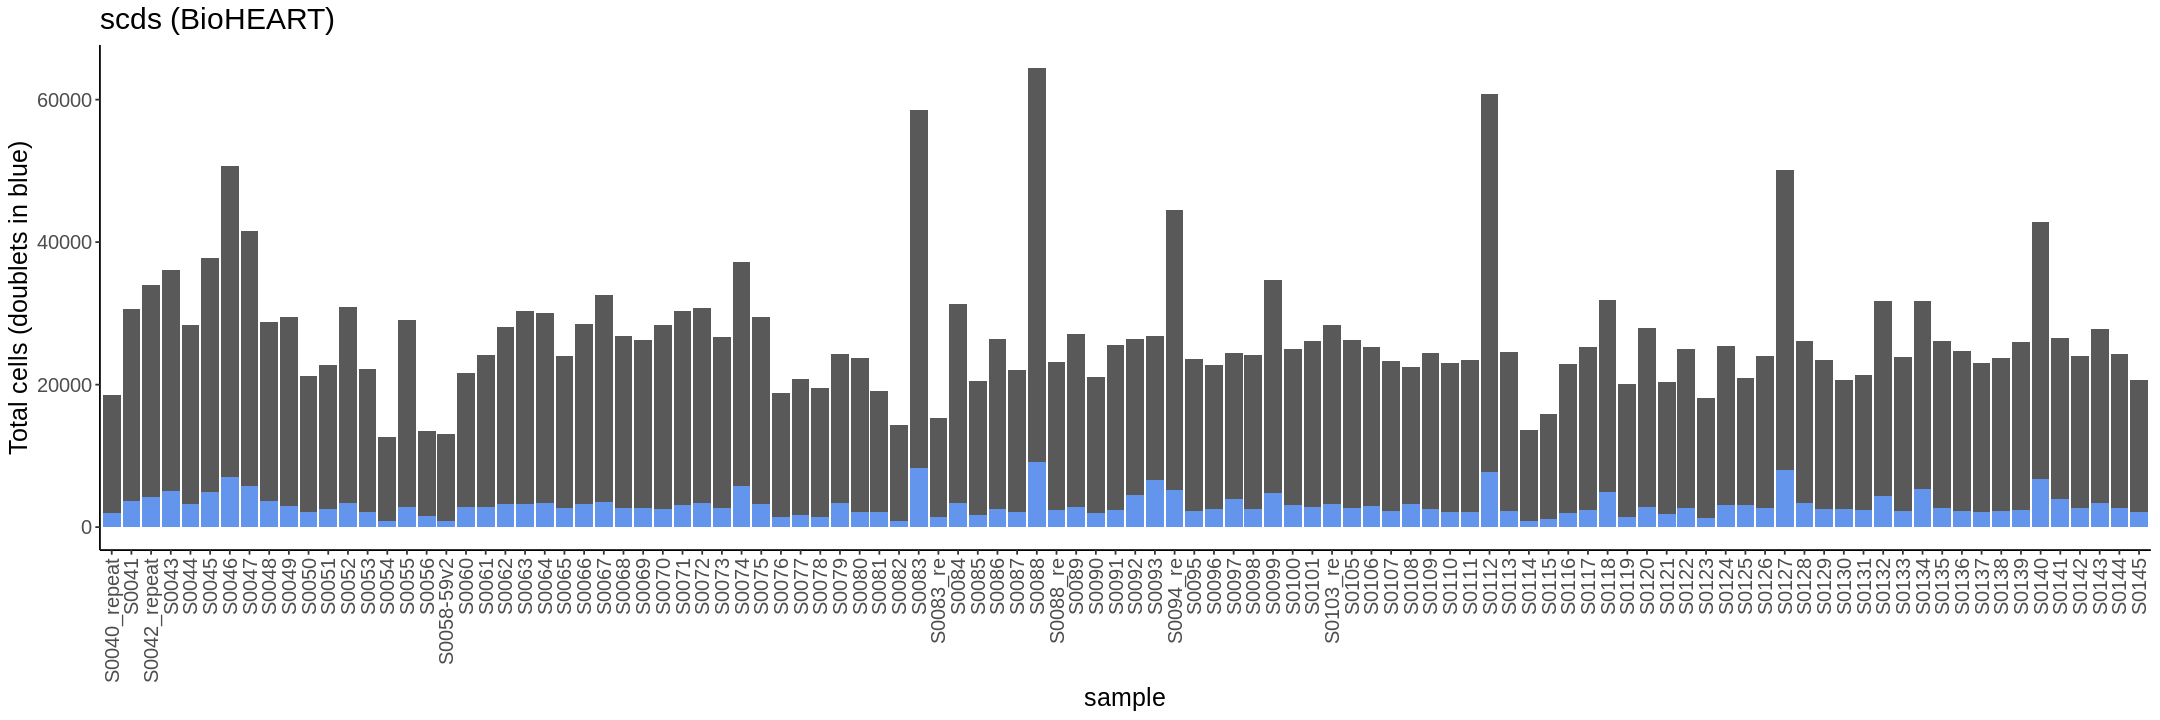

In [62]:
p = ggplot(df_summary2, aes(x=sample, y=(doublet_n+singlet_n))) + geom_bar(stat = "identity")
p = p + geom_bar(stat = "identity", aes(x=sample, y=doublet_n), fill="cornflowerblue")
p = p + theme_classic() + theme(text = element_text(size=15))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p2 = p + ylab("Total cells (doublets in blue)") + ggtitle("scds (BioHEART)")
p2

In [48]:
df_summary1 = df_summary[1:60,]
df_summary2 = df_summary[61:120,]
df_summary3 = df_summary[121:165,]
df_summary4 = df_summary[166:224,]

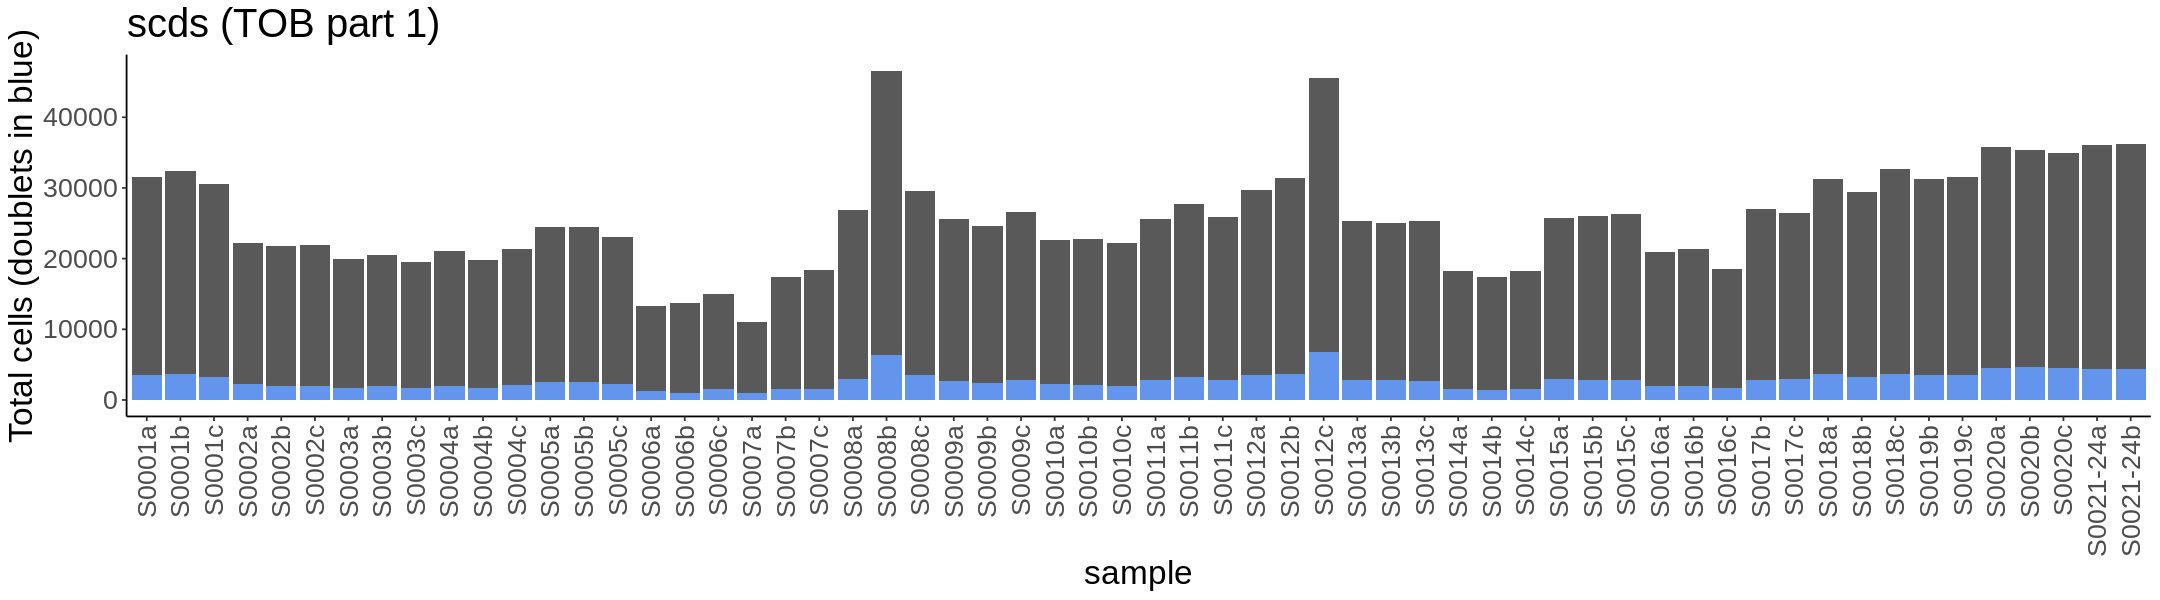

In [49]:
p = ggplot(df_summary1, aes(x=sample, y=(doublet_n+singlet_n))) + geom_bar(stat = "identity")
p = p + geom_bar(stat = "identity", aes(x=sample, y=doublet_n), fill="cornflowerblue")
p = p + theme_classic() + theme(text = element_text(size=20))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p1 = p + ylab("Total cells (doublets in blue)") + ggtitle("scds (TOB part 1)")
p1

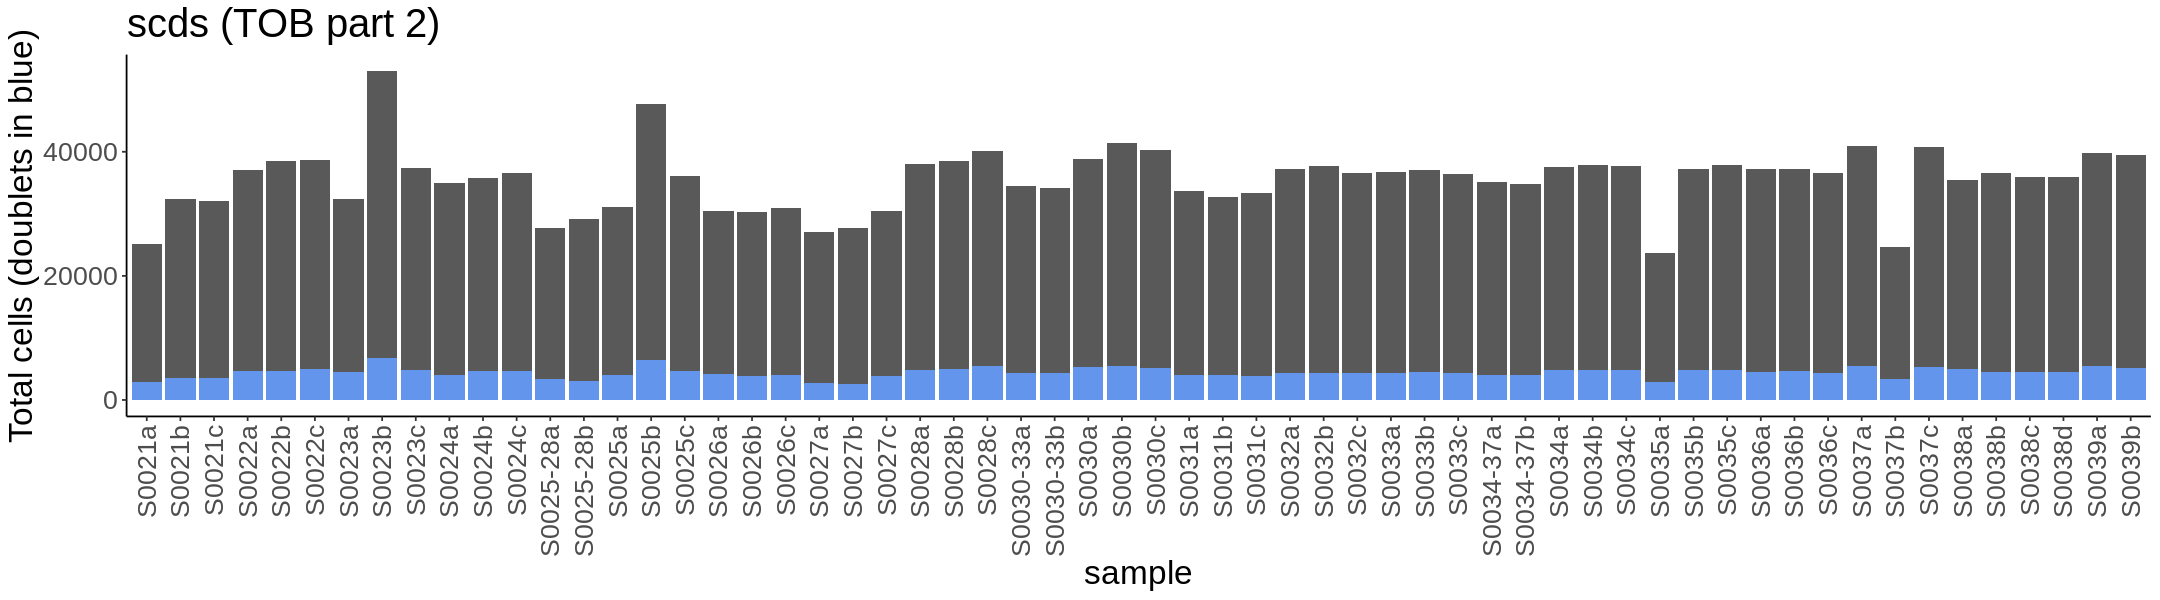

In [50]:
p = ggplot(df_summary2, aes(x=sample, y=(doublet_n+singlet_n))) + geom_bar(stat = "identity")
p = p + geom_bar(stat = "identity", aes(x=sample, y=doublet_n), fill="cornflowerblue")
p = p + theme_classic() + theme(text = element_text(size=20))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p2 = p + ylab("Total cells (doublets in blue)") + ggtitle("scds (TOB part 2)")
p2

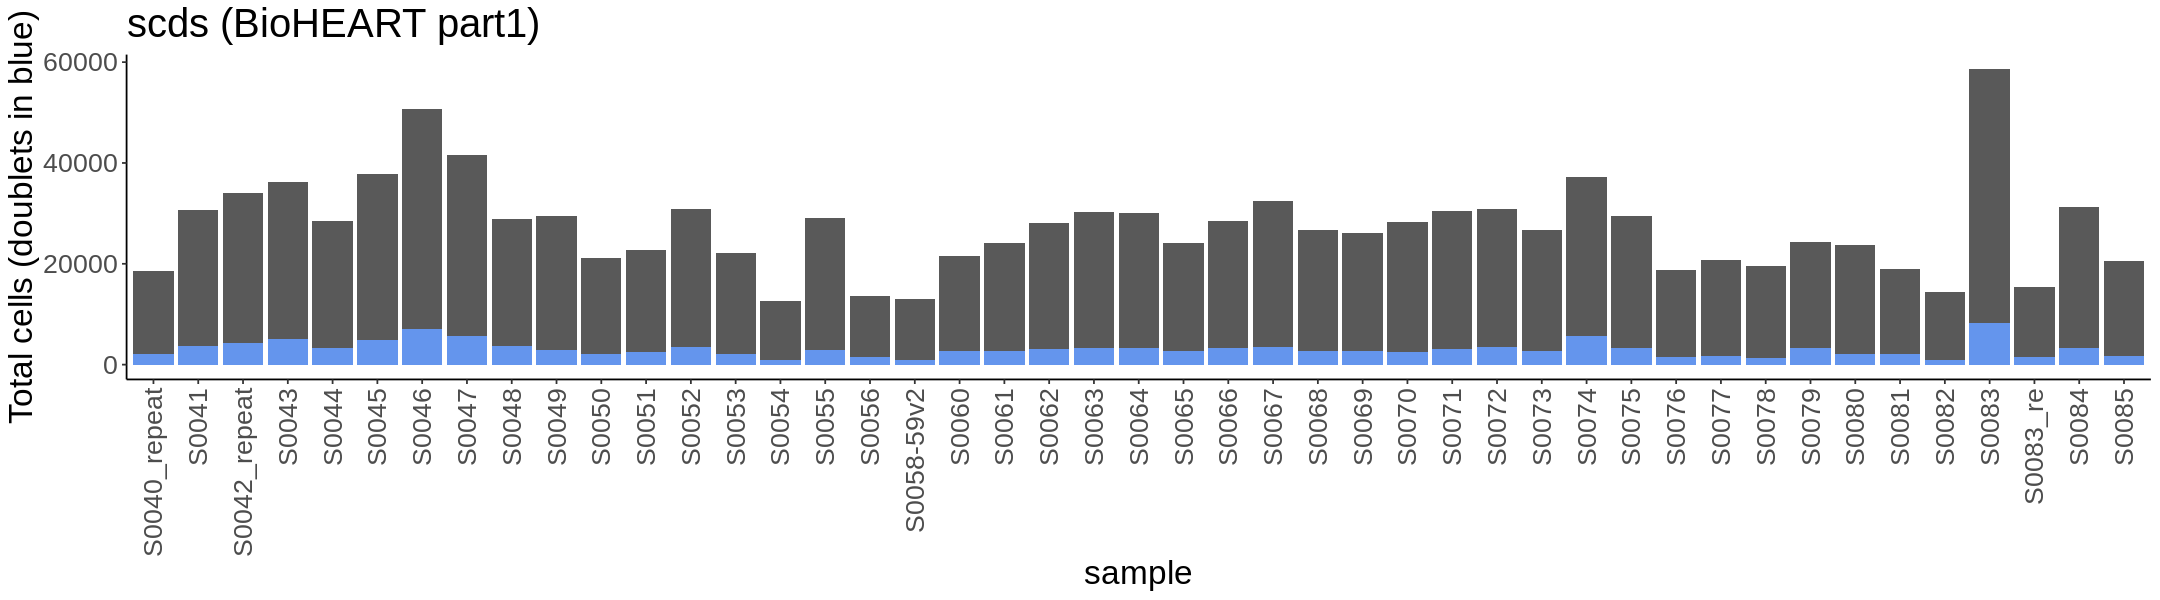

In [51]:
p = ggplot(df_summary3, aes(x=sample, y=(doublet_n+singlet_n))) + geom_bar(stat = "identity")
p = p + geom_bar(stat = "identity", aes(x=sample, y=doublet_n), fill="cornflowerblue")
p = p + theme_classic() + theme(text = element_text(size=20))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p3 = p + ylab("Total cells (doublets in blue)") + ggtitle("scds (BioHEART part1)")
p3

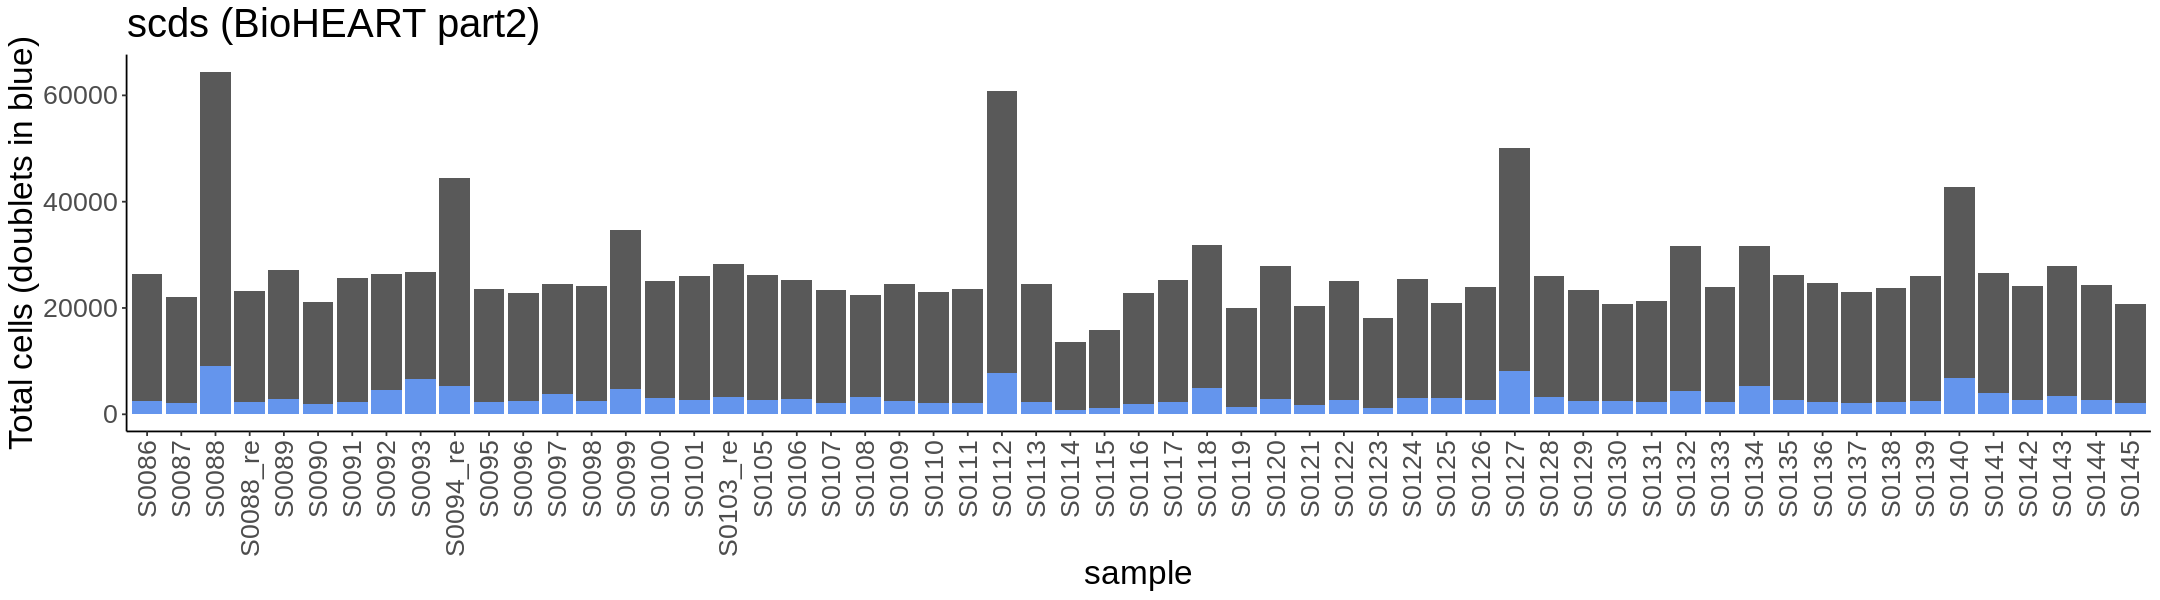

In [52]:
p = ggplot(df_summary4, aes(x=sample, y=(doublet_n+singlet_n))) + geom_bar(stat = "identity")
p = p + geom_bar(stat = "identity", aes(x=sample, y=doublet_n), fill="cornflowerblue")
p = p + theme_classic() + theme(text = element_text(size=20))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p4 = p + ylab("Total cells (doublets in blue)") + ggtitle("scds (BioHEART part2)")
p4